In [5]:
import numpy as np

In [16]:
#Classic K-arm bandit example 
class k_arm_bandit:
    def __init__(self, action_reward_mean, action_reward_variance, epsilon):
        self.k = len(action_reward_mean)
        self.action_reward_mean = action_reward_mean
        self.action_reward_variance = action_reward_variance
        self.epsilon = epsilon

        self.average_reward = 0
        self.n_actions = 0

        self.cumulating_average_reward = []

        self.Q = np.zeros(self.k)
        self.N = np.zeros(self.k)
    
    def generate_reward(self, action):
        return np.random.normal(self.action_reward_mean[action],self.action_reward_variance[action])

    def act(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.Q)

    def update_average_reward(self, reward):
        self.average_reward += (reward - self.average_reward) / (self.n_actions + 1)
        self.cumulating_average_reward.append(self.average_reward)
        self.n_actions += 1

    def update(self, action, reward):
        self.N[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]


In [35]:
def test_k_arm_bandit(kab):
    for i in range(10000):
        action = kab.act()
        reward = kab.generate_reward(action)
        kab.update_average_reward(reward)
        kab.update(action, reward)
    
    return kab.cumulating_average_reward

In [38]:
action_reward_mean = [1.0, 3.0, 2.0, 10.0, 1.0]
action_reward_variance = [1.0, 1.0, 1.0, 7.0, 1.0]

env1 = k_arm_bandit(action_reward_mean, action_reward_variance, epsilon=0.0)
env2 = k_arm_bandit(action_reward_mean, action_reward_variance, epsilon=0.01)
env3 = k_arm_bandit(action_reward_mean, action_reward_variance, epsilon=0.1)
env4 = k_arm_bandit(action_reward_mean, action_reward_variance, epsilon=0.5)

cumulative_avg_reward1 = test_k_arm_bandit(env1)
cumulative_avg_reward2 = test_k_arm_bandit(env2)
cumulative_avg_reward3 = test_k_arm_bandit(env3)
cumulative_avg_reward4 = test_k_arm_bandit(env4)

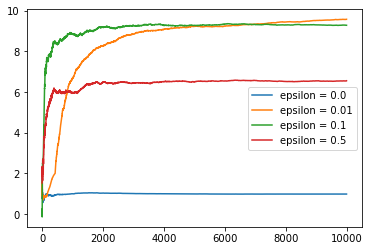

In [39]:
# Plot the average reward with labels on the chart for each epsilon value
import matplotlib.pyplot as plt
plt.plot(cumulative_avg_reward1, label='epsilon = 0.0')
plt.plot(cumulative_avg_reward2, label='epsilon = 0.01')
plt.plot(cumulative_avg_reward3, label='epsilon = 0.1')
plt.plot(cumulative_avg_reward4, label='epsilon = 0.5')
plt.legend()

# There is a clear difference in the average reward for each epsilon value
# This is because the epsilon value is used to determine whether to explore or exploit
# The higher the epsilon value, the more likely the agent will explore
# The lower the epsilon value, the more likely the agent will exploit
# The results highlight the trade-off between exploration and exploitation